# MDS clustering - influence of `initcc` during HDP (initial cluster number) 

#### Pierre Guilmin
November 2018  

## Requirements

See [mds_clustering.ipynb](https://github.com/PierreGuilmin/MDS_clustering/blob/master/mds_clustering.ipynb).

***

In [1]:
library('ggplot2')

source('utils/tools.R')     # custom tools function
source('utils/hdp_tools.R') # hdp related functions

theme_set(theme_minimal())

# set jupyer notebook parameters
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 200, # set the maximum number of rows displayed
        repr.matrix.max.cols = 100) # set the maximum number of columns displayed

Run citation('hdp') for citation instructions,
    and file.show(system.file('LICENSE', package='hdp')) for license details.


# Get data

In [2]:
# get cytogenetics data
dd_cyto <- impact <- read.table("data/dd_cyto_cut15.tsv", sep = "\t", stringsAsFactors = FALSE, header = TRUE)

# get mutation data
dd_mutation <- read.table("data/dd_mutation_hotspot_cut10.tsv", sep = "\t", stringsAsFactors = FALSE, header = TRUE)

# merge cytogenetics and mutation data
cat(all(rownames(dd_mutation) == rownames(dd_cyto)), '\n\n') # check if same row ordering
dd_all <- cbind(dd_mutation, dd_cyto)

print_size(dd_all)
head(dd_all, 3)

TRUE 

Size of dd_all: 3300 x 157

,ARID1A,ARID2,ASXL1,ASXL2,ATRX,BCOR,BCORL1,BRAF,BRCC3,CALR,CBL,CDKN1B,CDKN2A,CEBPA,CREBBP,CSF1R,CSF3R,CSNK1A1,CTCF,CUX1,DDX23,DDX4,DDX41,DDX54,DHX33,DICER1,DNMT3A,DNMT3B,EED,EGFR,EP300,ETNK1,ETV6,EZH2,FAM175A,FLT3,GATA1,GATA2,GNAS,GNB1,HIPK2,IDH1,IDH2_140,IDH2_172,IRF1,JAK2,JARID2,KDM5C,KDM6A,KIT,⋯,del5q,plus8,del7,delY,del20q,mar,del7q,del12p,del11q,del18,del17p,del5,plus21,del17,del13,del3p,plus1q,del16,del20,plus11q,plus1p,del16q,del12,del1p,plus19,del13q,del21,del9q,plus1,plus22,plus17q,del4q,plus11,plus14,del3,del3q,plus17p,r_3_3,del11p,del14,del15,delX,plus9,r_9_9,plus13,plus15,r_1_7,del22,ring,WGA
I-H-132697-T1-1-D1-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
I-H-132698-T1-1-D1-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
I-H-116889-T2-1-D1-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# Setup hdp

In [3]:
# initialise hdp
hdp <- initialise_hdp(dd_all)

Initialise HDP on a 3300 x 157 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!


In [4]:
run_hdp <- function(initcc) {
    # run hdp
    hdp_output <- activate_and_run_hdp(hdp,
                                       initcc = initcc,
                                       burnin = 1000,
                                       n      = 300,
                                       space  = 20,
                                       seed   = 42)

    # assess quality of posterior sampling chain
    plot_posterior_sampling_chain_quality(hdp_output, 20, 5)

    # extract and plot components
    hdp_output <- extract_components(hdp_output)
    plot_components_size(hdp_output, 20, 5)
}

## `initcc = 2`

Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "1000 burn-in iterations in 0.1 mins"
Extract HDP components from posterior sampling
  → extract components...

Warning message in hdp_extract_components(hdp_output):
“Extracting components on single posterior sampling chain. Recommend switching to multiple independent chains in a hdpSampleMulti object, see ?hdp_multi_chain”

 done!
* 5 components found


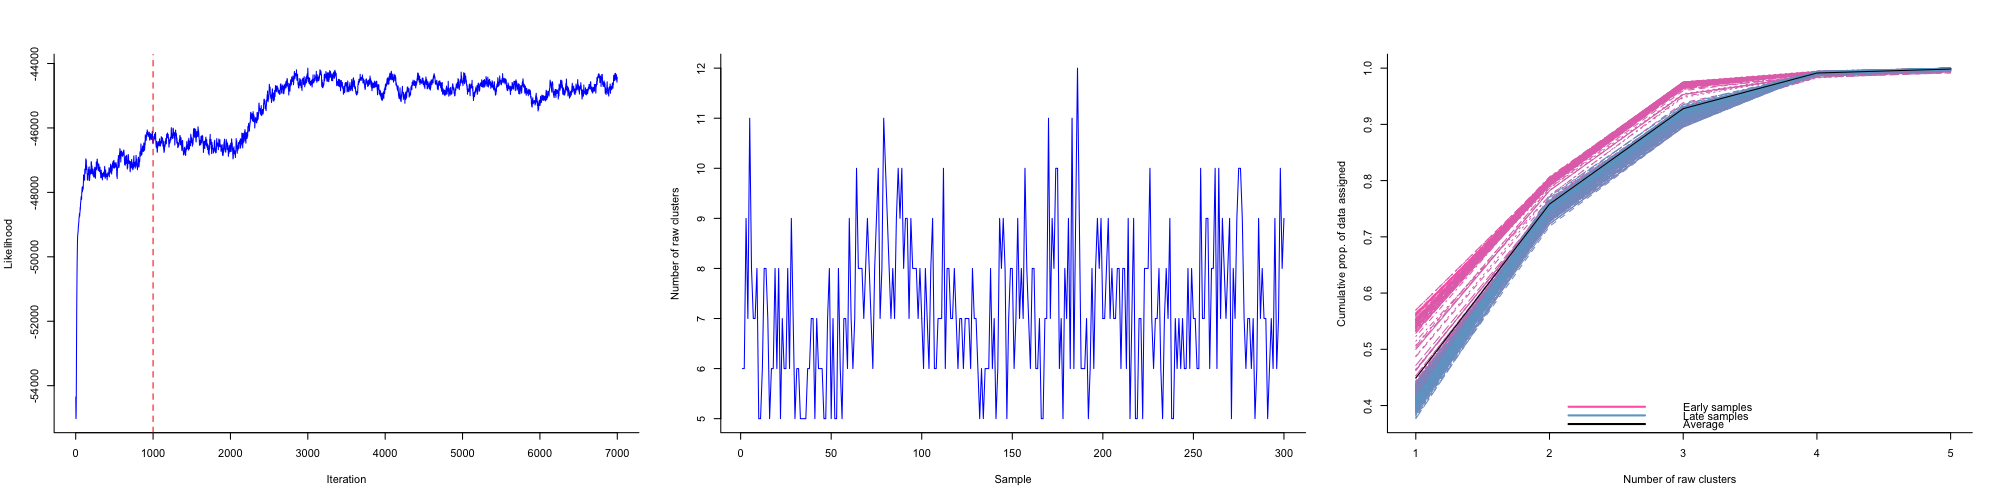

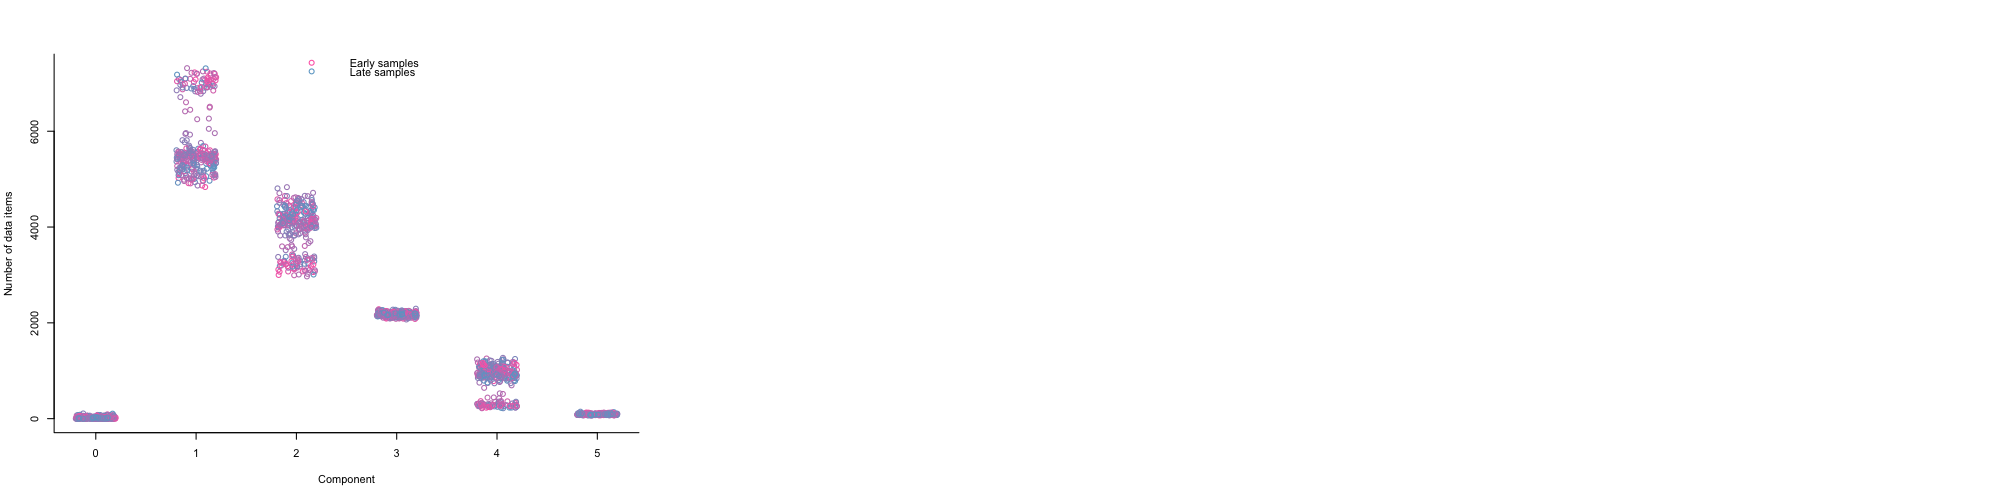

In [5]:
run_hdp(2)

## `initcc = 5`

Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "1000 burn-in iterations in 0.2 mins"
[1] "time 1.3 ETC 1.9 mins"
Extract HDP components from posterior sampling
  → extract components...

Warning message in hdp_extract_components(hdp_output):
“Extracting components on single posterior sampling chain. Recommend switching to multiple independent chains in a hdpSampleMulti object, see ?hdp_multi_chain”

 done!
* 8 components found


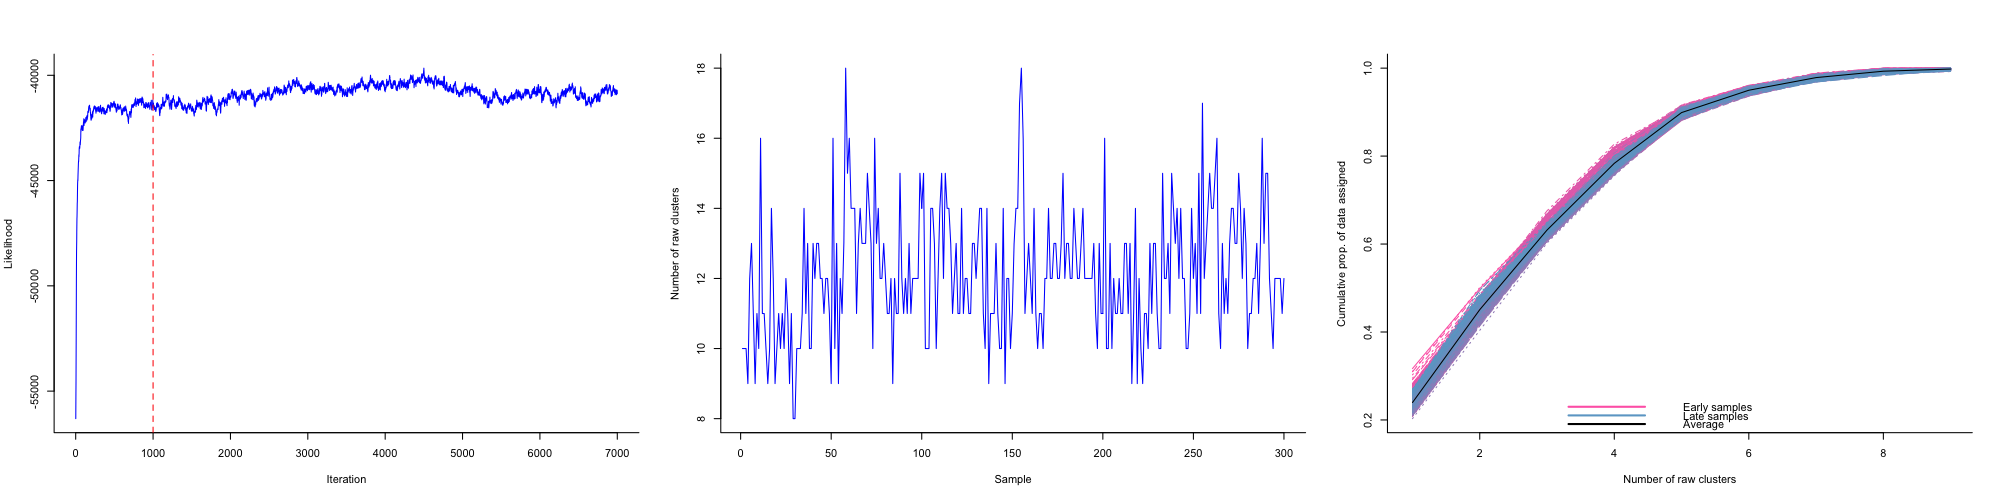

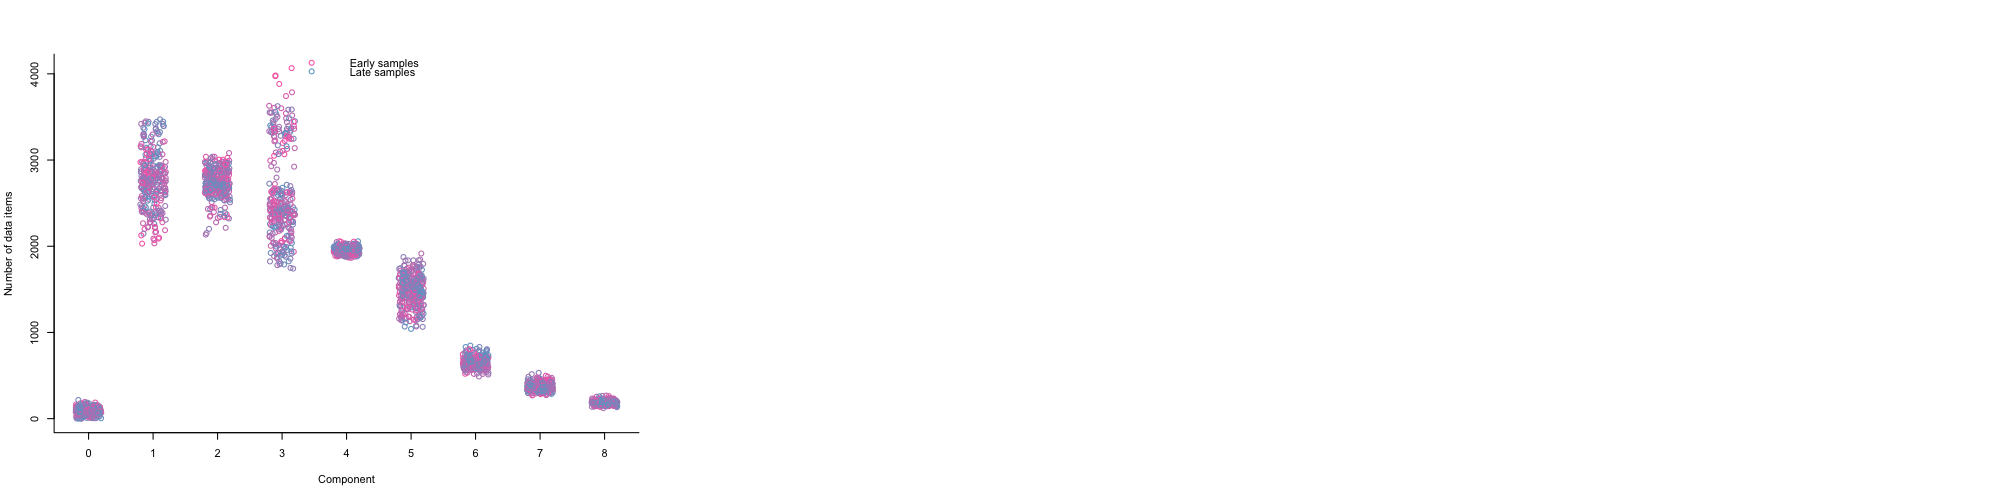

In [6]:
run_hdp(5)

## `initcc = 7`

Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "1000 burn-in iterations in 0.2 mins"
[1] "time 1.2 ETC 1.2 mins"
Extract HDP components from posterior sampling
  → extract components...

Warning message in hdp_extract_components(hdp_output):
“Extracting components on single posterior sampling chain. Recommend switching to multiple independent chains in a hdpSampleMulti object, see ?hdp_multi_chain”

 done!
* 9 components found


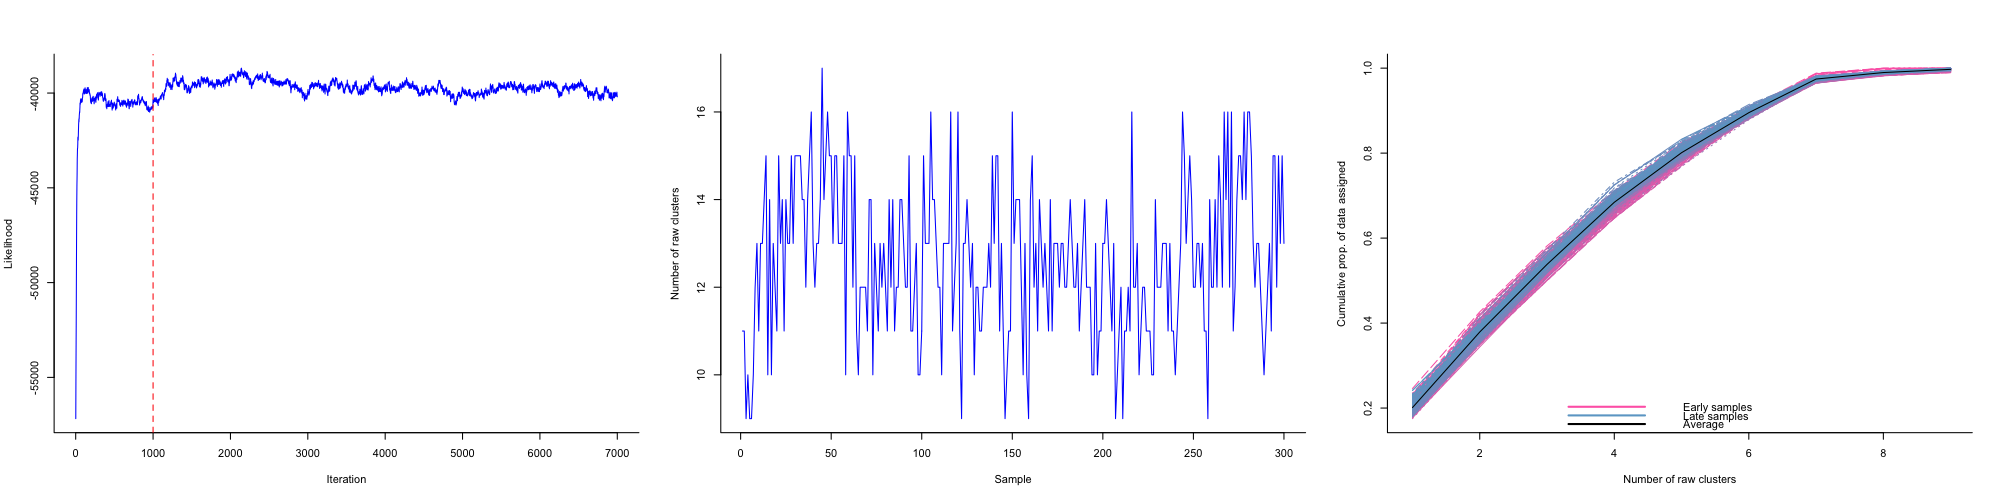

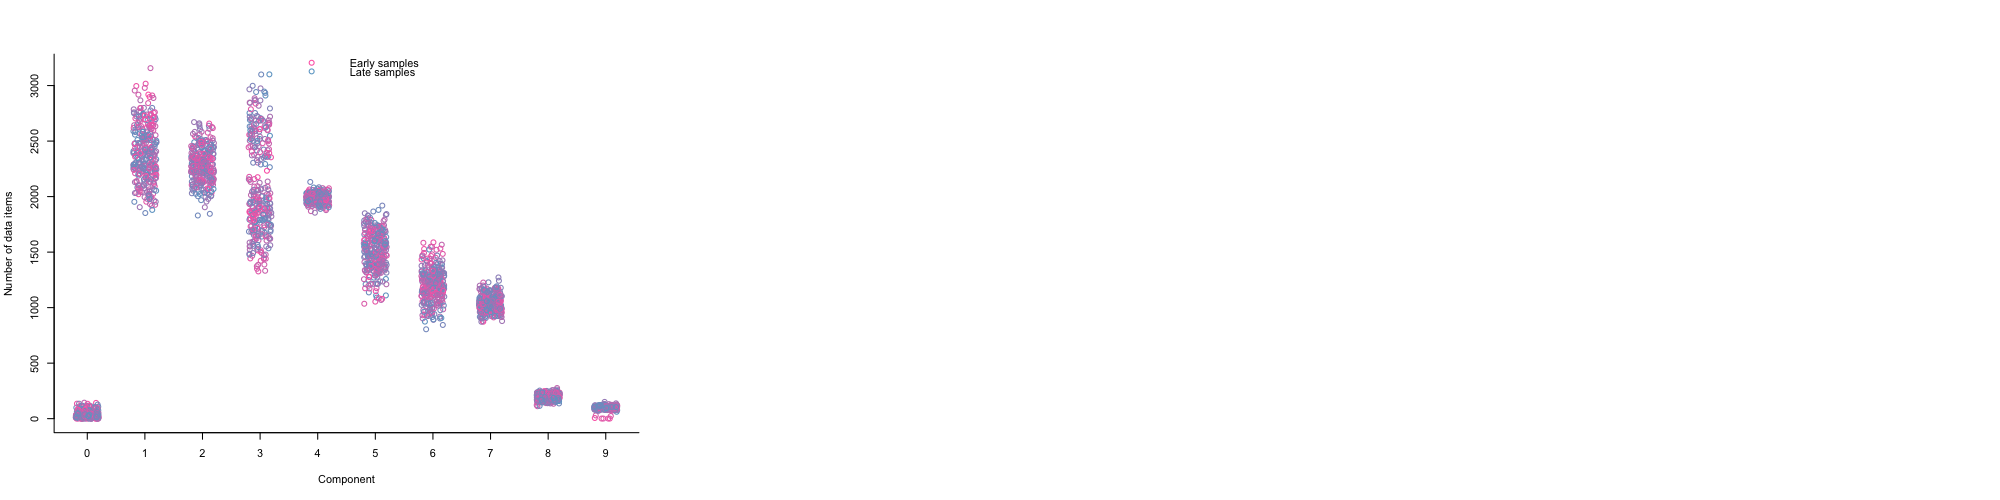

In [7]:
run_hdp(7)

## `initcc = 10`

Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "1000 burn-in iterations in 0.3 mins"
[1] "time 1.3 ETC 1.6 mins"
Extract HDP components from posterior sampling
  → extract components...

Warning message in hdp_extract_components(hdp_output):
“Extracting components on single posterior sampling chain. Recommend switching to multiple independent chains in a hdpSampleMulti object, see ?hdp_multi_chain”

 done!
* 11 components found


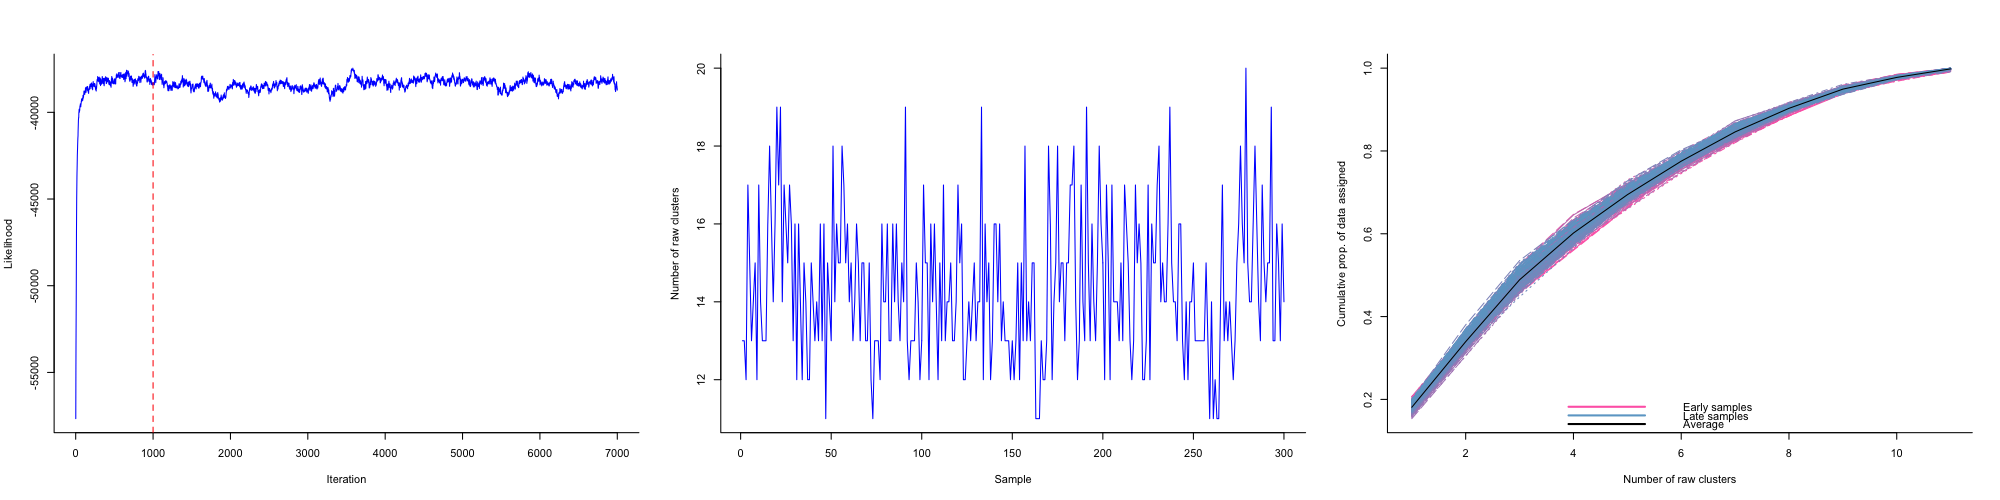

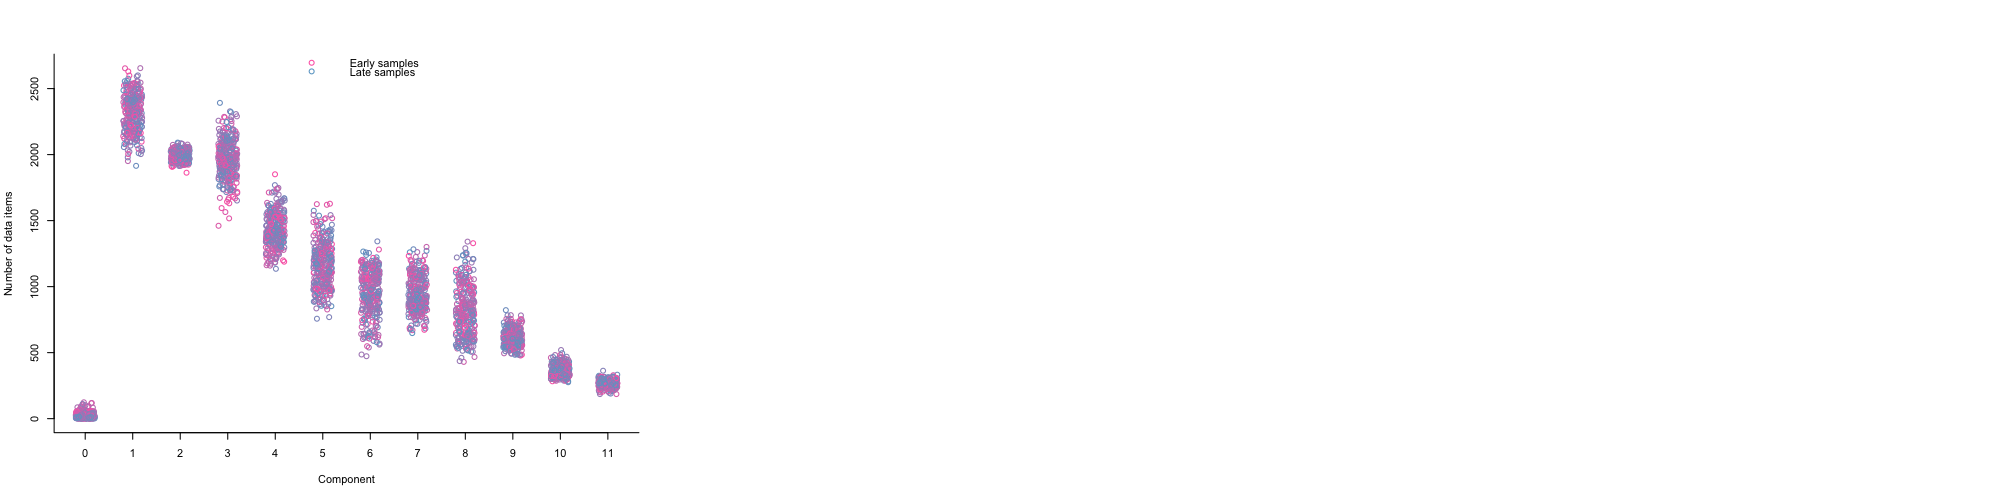

In [8]:
run_hdp(10)

## `initcc = 15`

Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "1000 burn-in iterations in 0.2 mins"
[1] "time 1.2 ETC 1.6 mins"
Extract HDP components from posterior sampling
  → extract components...

Warning message in hdp_extract_components(hdp_output):
“Extracting components on single posterior sampling chain. Recommend switching to multiple independent chains in a hdpSampleMulti object, see ?hdp_multi_chain”

 done!
* 12 components found


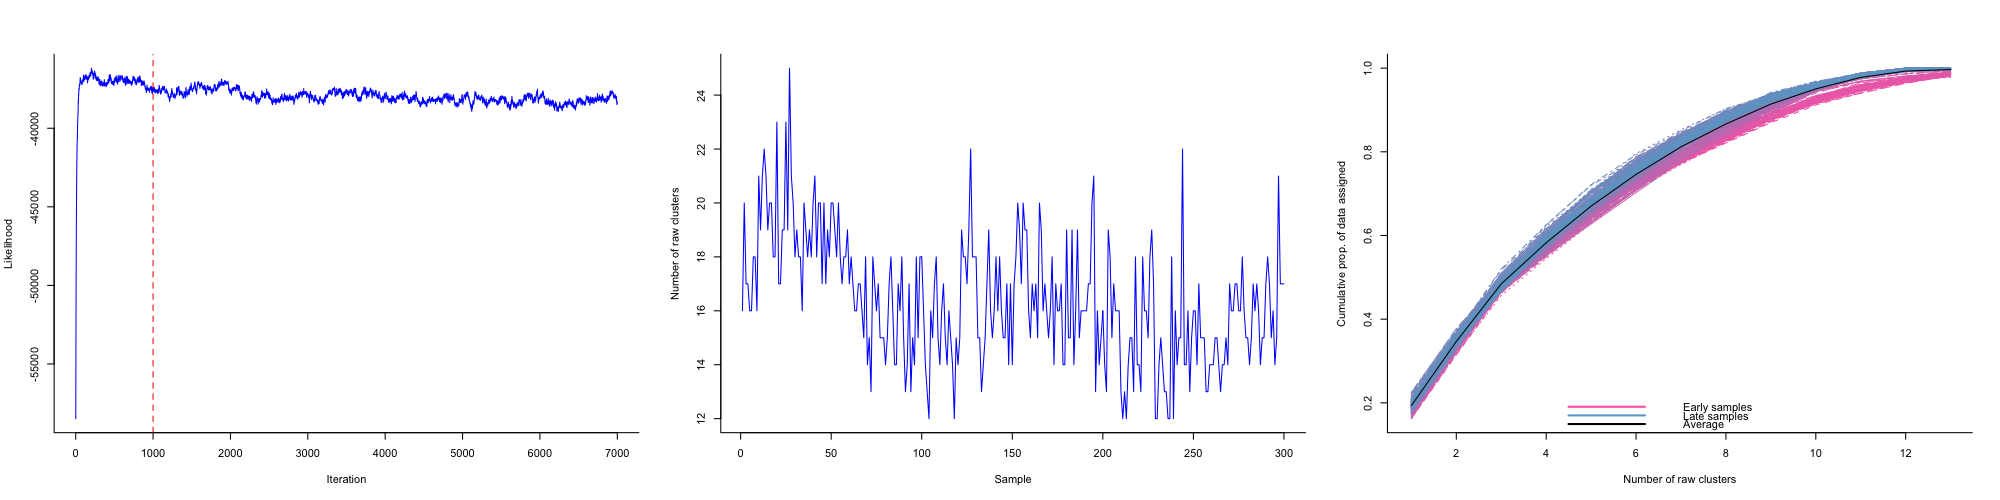

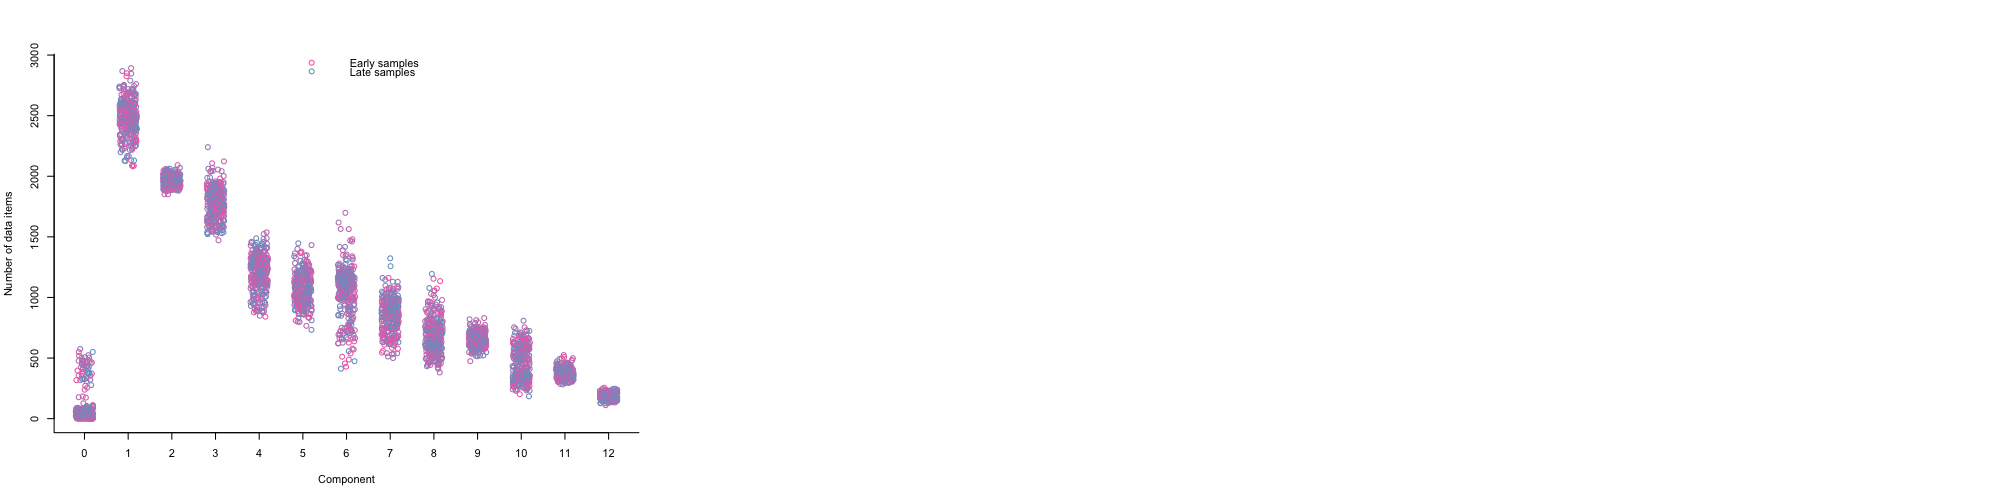

In [9]:
run_hdp(15)

## `initcc = 17`

Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "1000 burn-in iterations in 0.2 mins"
[1] "time 1.3 ETC 1.6 mins"
Extract HDP components from posterior sampling
  → extract components...

Warning message in hdp_extract_components(hdp_output):
“Extracting components on single posterior sampling chain. Recommend switching to multiple independent chains in a hdpSampleMulti object, see ?hdp_multi_chain”

 done!
* 11 components found


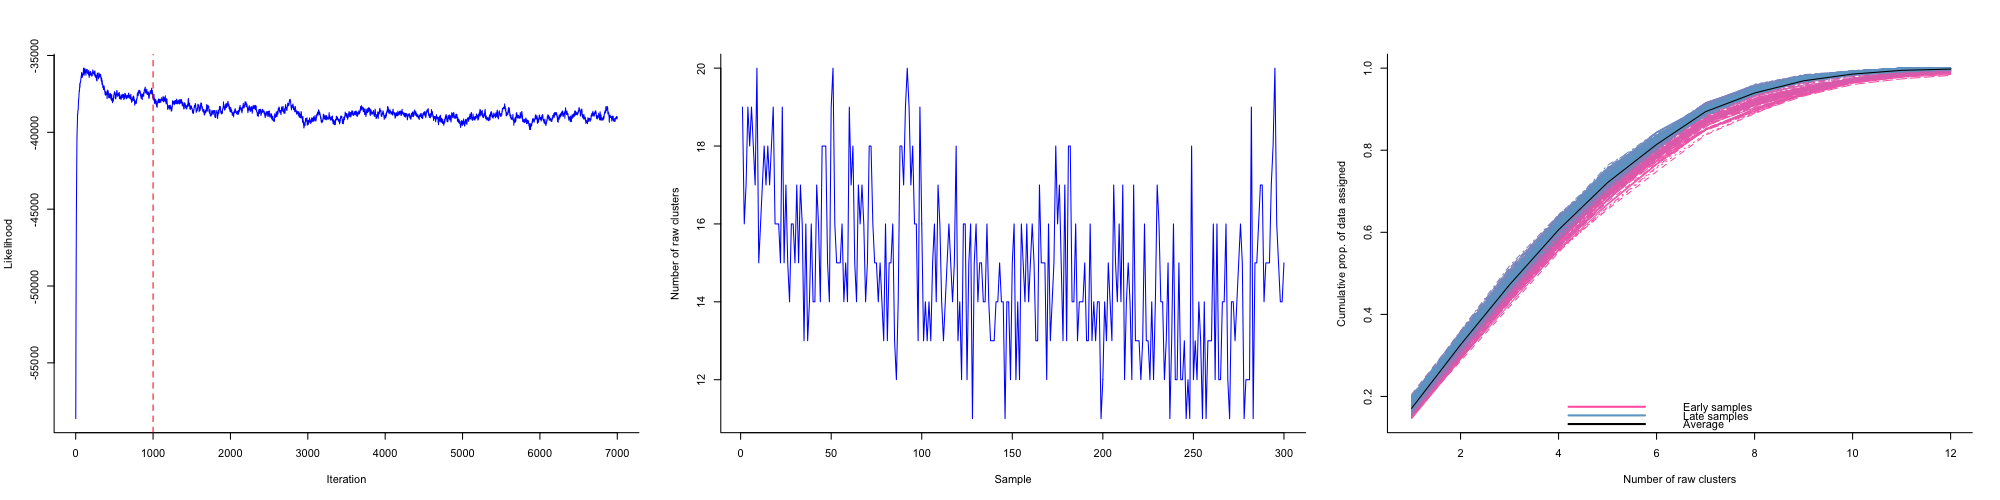

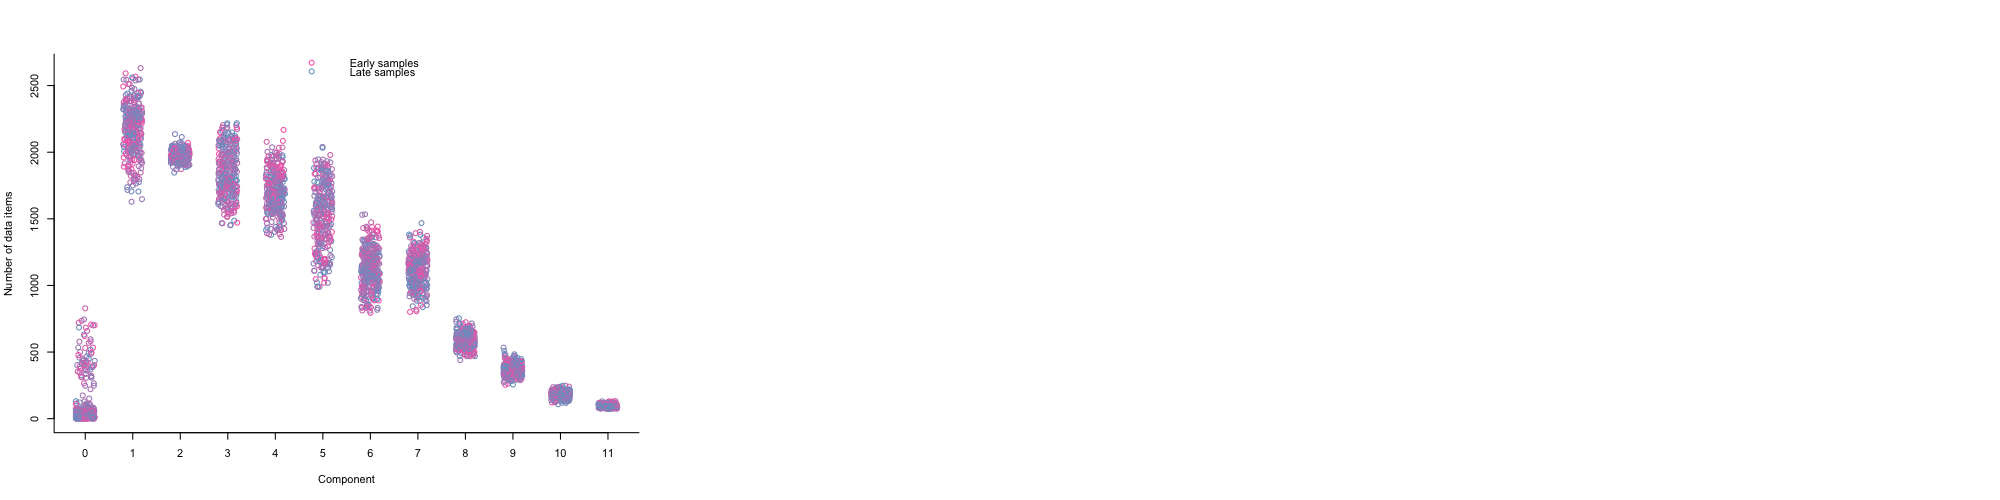

In [10]:
run_hdp(17)

## `initcc = 20`

Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "1000 burn-in iterations in 0.2 mins"
[1] "time 1.3 ETC 2.0 mins"
Extract HDP components from posterior sampling
  → extract components...

Warning message in hdp_extract_components(hdp_output):
“Extracting components on single posterior sampling chain. Recommend switching to multiple independent chains in a hdpSampleMulti object, see ?hdp_multi_chain”

 done!
* 13 components found


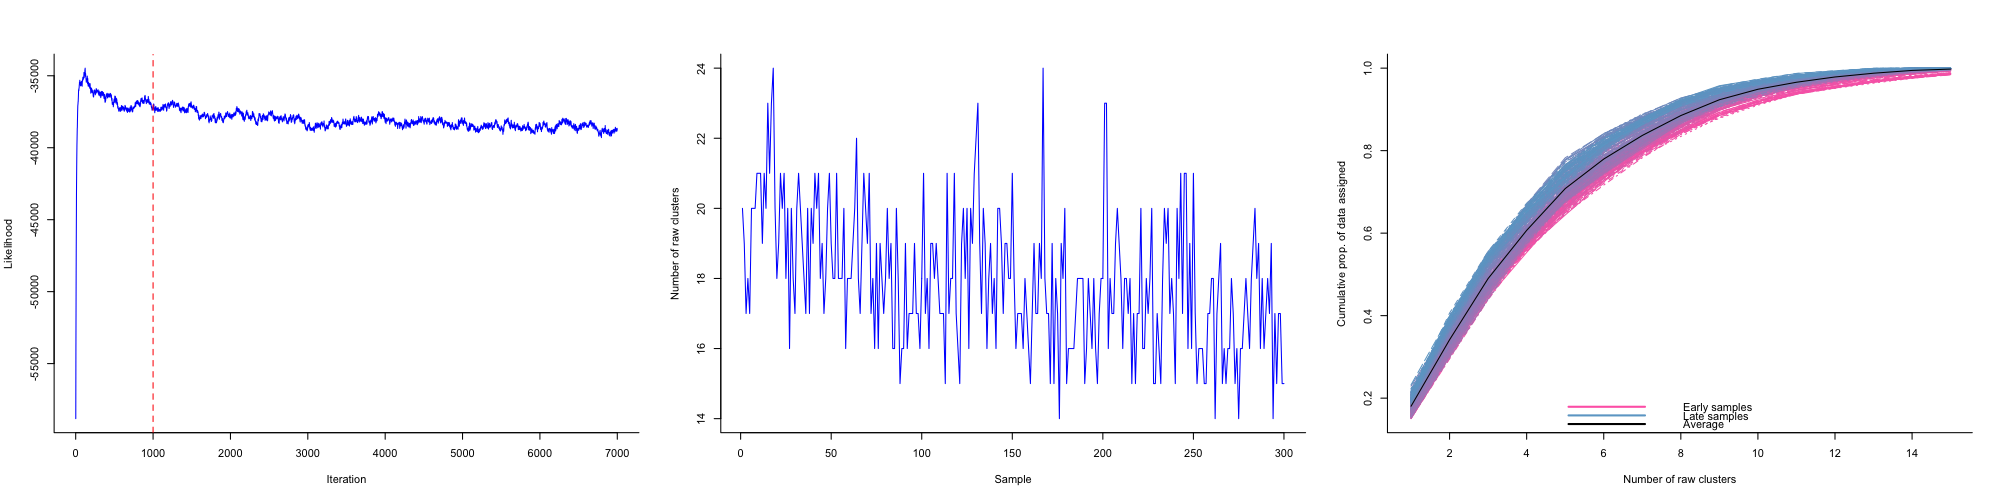

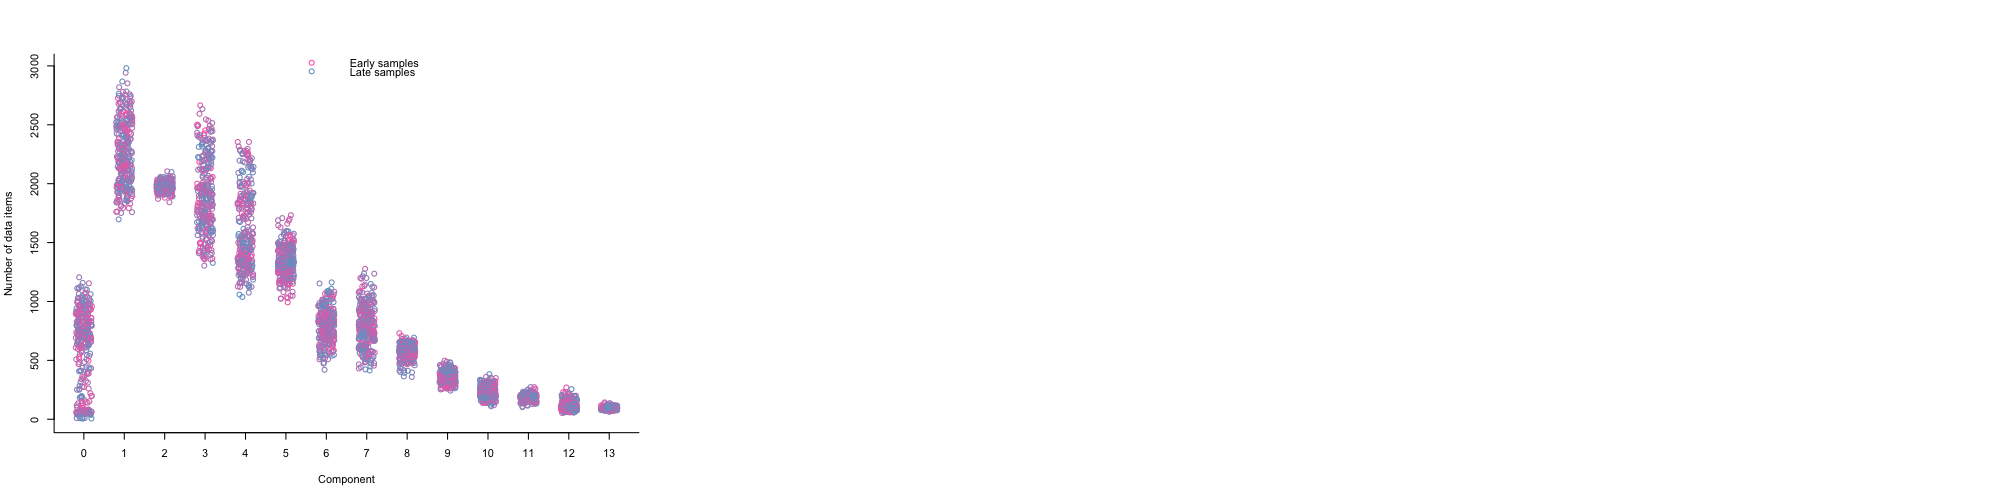

In [11]:
run_hdp(20)

## `initcc = 30`

Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "1000 burn-in iterations in 0.4 mins"
[1] "time 1.4 ETC 2.0 mins"
Extract HDP components from posterior sampling
  → extract components...

Warning message in hdp_extract_components(hdp_output):
“Extracting components on single posterior sampling chain. Recommend switching to multiple independent chains in a hdpSampleMulti object, see ?hdp_multi_chain”

 done!
* 12 components found


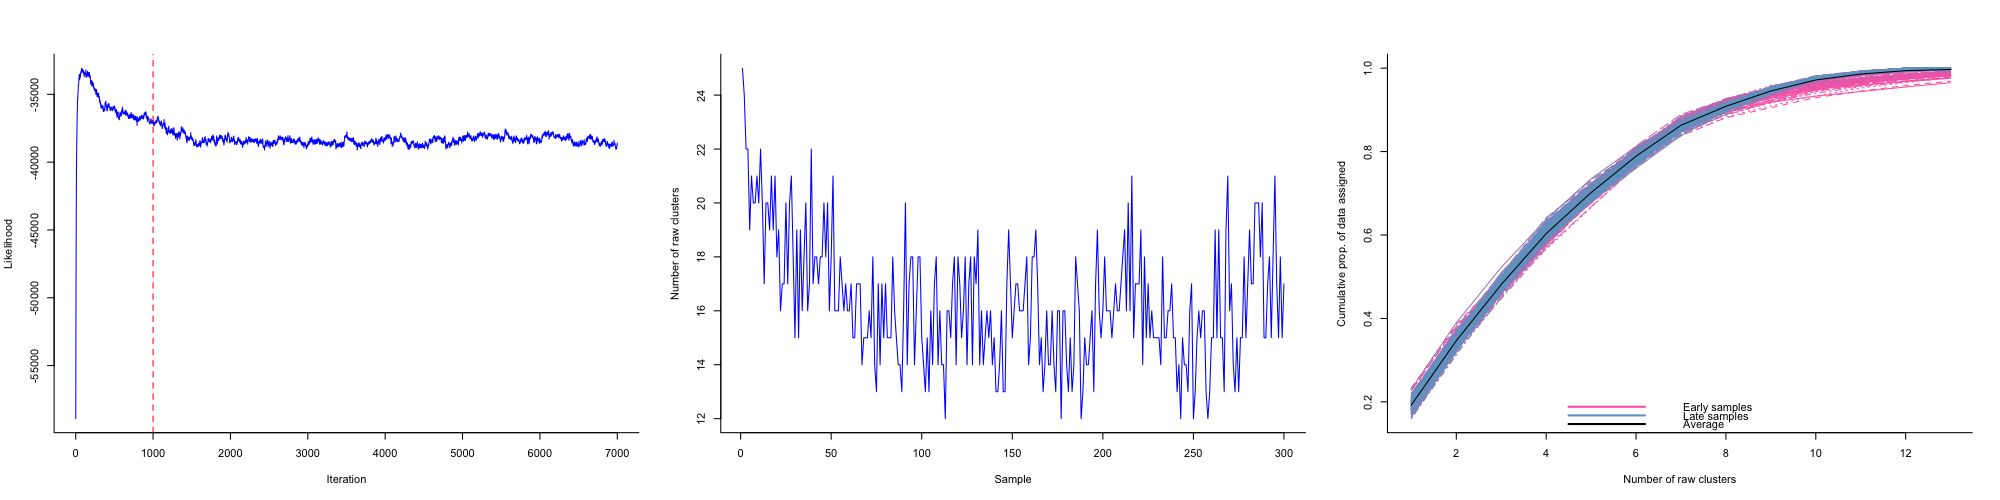

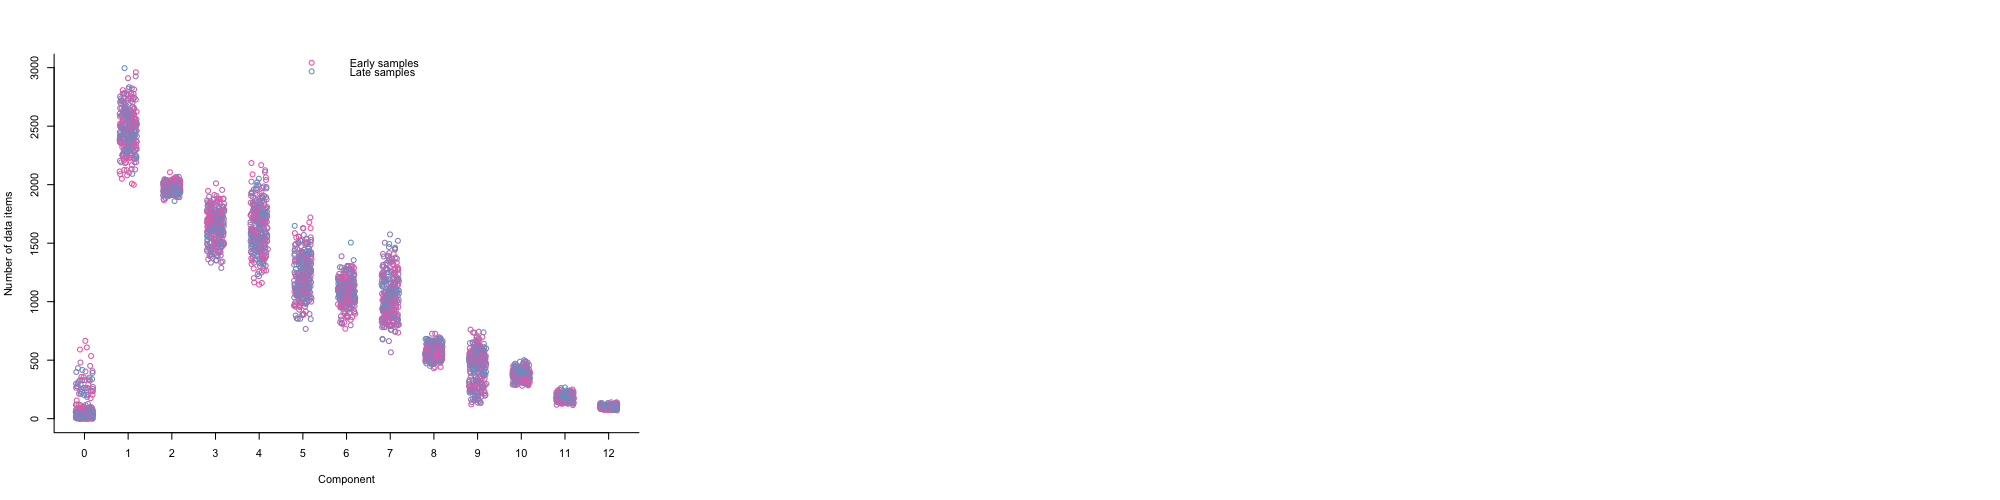

In [12]:
run_hdp(30)

## `initcc = 50`

Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "1000 burn-in iterations in 0.5 mins"
[1] "time 1.5 ETC 1.8 mins"
Extract HDP components from posterior sampling
  → extract components...

Warning message in hdp_extract_components(hdp_output):
“Extracting components on single posterior sampling chain. Recommend switching to multiple independent chains in a hdpSampleMulti object, see ?hdp_multi_chain”

 done!
* 12 components found


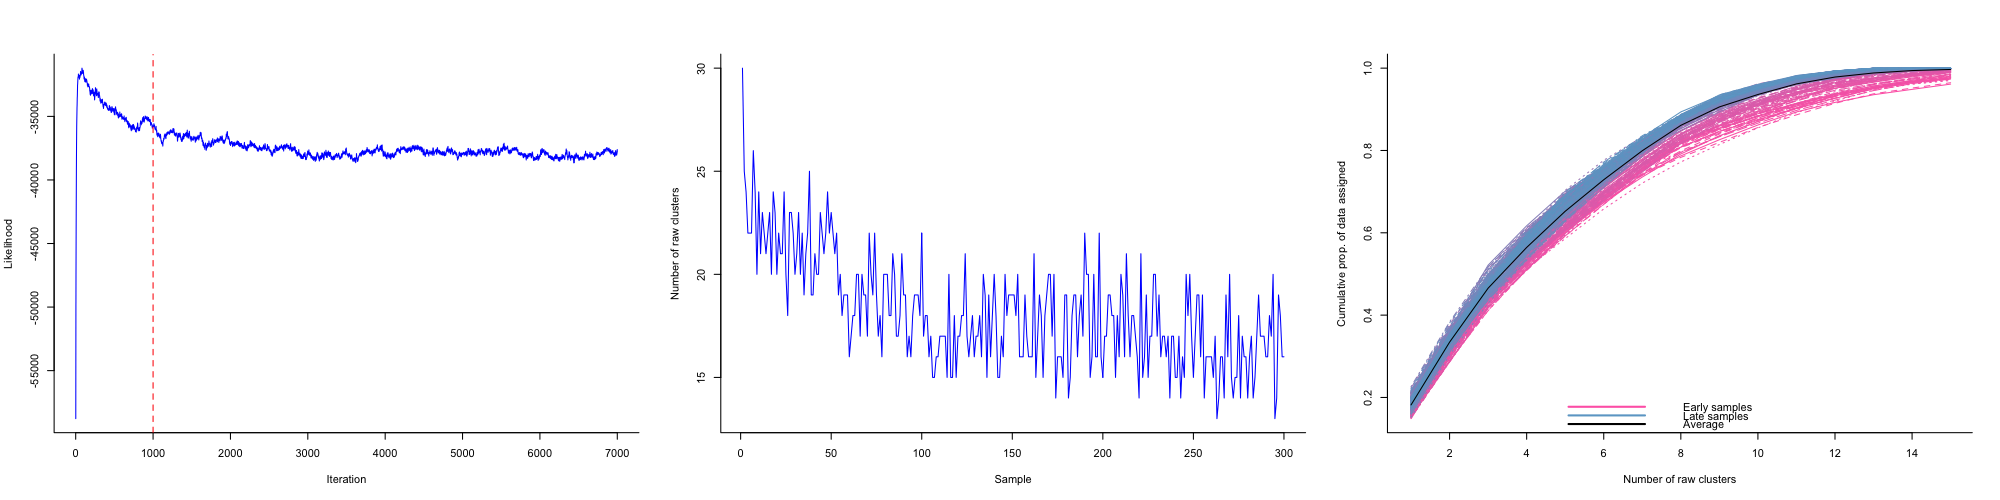

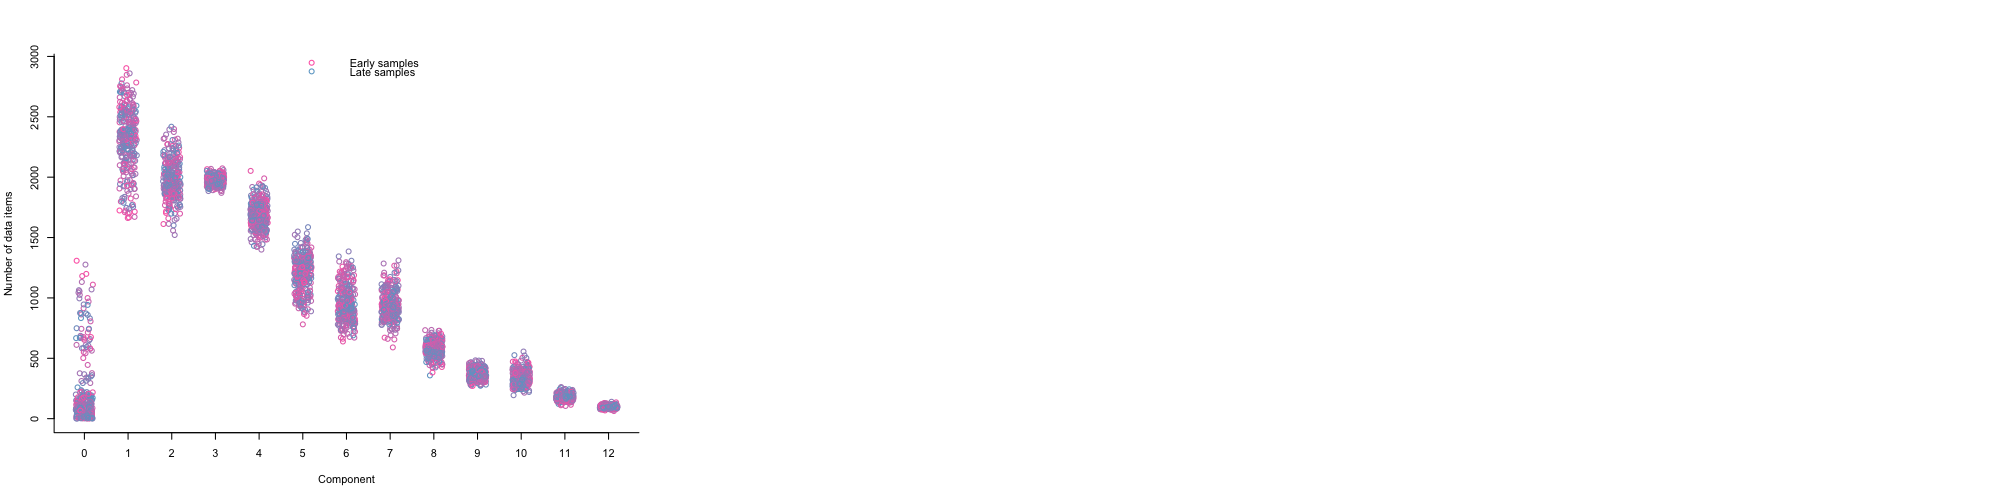

In [13]:
run_hdp(50)